# Manjeet Singh - MoneyLion Loan Repayment Challanege

I work as a full time employee here at Star Rapid. So I could not dedicate much time to this task.

It took around 3-4 hours to finish this whole model and making this notebook.

In [198]:
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing,metrics 
pd.set_option("display.max_columns",75)
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report, accuracy_score
import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier

# Lets Import the data

In [199]:
loan = pd.read_csv('C:/Users/msingh/Downloads/MoneyLion/data/loan.csv')
payment = pd.read_csv('C:/Users/msingh/Downloads/MoneyLion/data/payment.csv')
underwriting = pd.read_csv('C:/Users/msingh/Downloads/MoneyLion/data/clarity_underwriting_variables.csv')

In [200]:
loan.columns

Index(['loanId', 'anon_ssn', 'payFrequency', 'apr', 'applicationDate',
       'originated', 'originatedDate', 'nPaidOff', 'approved', 'isFunded',
       'loanStatus', 'loanAmount', 'originallyScheduledPaymentAmount', 'state',
       'leadType', 'leadCost', 'fpStatus', 'clarityFraudId', 'hasCF'],
      dtype='object')

In [201]:
payment.columns

Index(['loanId', 'installmentIndex', 'isCollection', 'paymentDate',
       'principal', 'fees', 'paymentAmount', 'paymentStatus',
       'paymentReturnCode'],
      dtype='object')

In [202]:
underwriting.columns

Index(['.underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago',
       '.underwritingdataclarity.clearfraud.clearfraudinquiry.twentyfourhoursago',
       '.underwritingdataclarity.clearfraud.clearfraudinquiry.oneminuteago',
       '.underwritingdataclarity.clearfraud.clearfraudinquiry.onehourago',
       '.underwritingdataclarity.clearfraud.clearfraudinquiry.ninetydaysago',
       '.underwritingdataclarity.clearfraud.clearfraudinquiry.sevendaysago',
       '.underwritingdataclarity.clearfraud.clearfraudinquiry.tenminutesago',
       '.underwritingdataclarity.clearfraud.clearfraudinquiry.fifteendaysago',
       '.underwritingdataclarity.clearfraud.clearfraudinquiry.threesixtyfivedaysago',
       '.underwritingdataclarity.clearfraud.clearfraudindicator.inquiryonfilecurrentaddressconflict',
       '.underwritingdataclarity.clearfraud.clearfraudindicator.totalnumberoffraudindicators',
       '.underwritingdataclarity.clearfraud.clearfraudindicator.telephonenumberinconsistentw

# Join Loan and Payment datasets by LoanId.

In [203]:
merged = pd.merge(left=loan, right=payment, left_on='loanId', right_on='loanId')
merged.shape
merged

loanId                          anon_ssn payFrequency    apr  \
0       LL-I-06644937  464f5d9ae4fa09ece4048d949191865c            B  199.0   
1       LL-I-06644937  464f5d9ae4fa09ece4048d949191865c            B  199.0   
2       LL-I-06644937  464f5d9ae4fa09ece4048d949191865c            B  199.0   
3       LL-I-06644937  464f5d9ae4fa09ece4048d949191865c            B  199.0   
4       LL-I-06644937  464f5d9ae4fa09ece4048d949191865c            B  199.0   
...               ...                               ...          ...    ...   
689359  LL-I-13311312  043dd86c24c63c8968082fa3ad7a8911            W  645.0   
689360  LL-I-13311312  043dd86c24c63c8968082fa3ad7a8911            W  645.0   
689361  LL-I-13311312  043dd86c24c63c8968082fa3ad7a8911            W  645.0   
689362  LL-I-13311312  043dd86c24c63c8968082fa3ad7a8911            W  645.0   
689363  LL-I-13311312  043dd86c24c63c8968082fa3ad7a8911            W  645.0   

                   applicationDate  originated              originatedDate  \
0       2016-01-19T22:07:36.778000        True  2016-01-20T15:49:18.846000   
1       2016-01-19T22:07:36.778000        True  2016-01-20T15:49:18.846000   
2       2016-01-19T22:07:36.778000        True  2016-01-20T15:49:18.846000   
3       2016-01-19T22:07:36.778000        True  2016-01-20T15:49:18.846000   
4       2016-01-19T22:07:36.778000        True  2016-01-20T15:49:18.846000   
...                            ...         ...                         ...   
689359  2016-12-16T20:20:30.157000        True  2016-12-16T23:15:06.874000   
689360  2016-12-16T20:20:30.157000        True  2016-12-16T23:15:06.874000   
689361  2016-12-16T20:20:30.157000        True  2016-12-16T23:15:06.874000   
689362  2016-12-16T20:20:30.157000        True  2016-12-16T23:15:06.874000   
689363  2016-12-16T20:20:30.157000        True  2016-12-16T23:15:06.874000   

        nPaidOff  approved  isFunded     loanStatus  loanAmount  \
0            0.0      True         1  Paid Off Loan      3000.0   
1            0.0      True         1  Paid Off Loan      3000.0   
2            0.0      True         1  Paid Off Loan      3000.0   
3            0.0      True         1  Paid Off Loan      3000.0   
4            0.0      True         1  Paid Off Loan      3000.0   
...          ...       ...       ...            ...         ...   
689359       0.0      True         1  Paid Off Loan       300.0   
689360       0.0      True         1  Paid Off Loan       300.0   
689361       0.0      True         1  Paid Off Loan       300.0   
689362       0.0      True         1  Paid Off Loan       300.0   
689363       0.0      True         1  Paid Off Loan       300.0   

        originallyScheduledPaymentAmount state   leadType  leadCost fpStatus  \
0                                6395.19    CA  prescreen         0  Checked   
1                                6395.19    CA  prescreen         0  Checked   
2                                6395.19    CA  prescreen         0  Checked   
3                                6395.19    CA  prescreen         0  Checked   
4                                6395.19    CA  prescreen         0  Checked   
...                                  ...   ...        ...       ...      ...   
689359                           1034.38    CT       lead         6  Checked   
689360                           1034.38    CT       lead         6  Checked   
689361                           1034.38    CT       lead         6  Checked   
689362                           1034.38    CT       lead         6  Checked   
689363                           1034.38    CT       lead         6  Checked   

                  clarityFraudId  hasCF  installmentIndex  isCollection  \
0       569eb3a3e4b096699f685d64      1                 1         False   
1       569eb3a3e4b096699f685d64      1                 2         False   
2       569eb3a3e4b096699f685d64      1                 3         False   
3       569eb3a3e4b096699f685d64      1                 4      

Right now, I just want to use Fraudscore from 3rd dataset- Underwriting so I just select only following two columns from the dataset for the time being. We can use other columns later.

In [204]:
df = underwriting[['clearfraudscore', 'underwritingid']]

 Now Lets Join Merged dataset and df dataset(2 columns from underwriting). Use clarityFraudId and underwritingid to join both the datasets.

In [205]:
merged = pd.merge(left=merged, right=df, left_on='clarityFraudId', right_on='underwritingid')
merged.shape
merged

loanId                          anon_ssn payFrequency    apr  \
0       LL-I-06644937  464f5d9ae4fa09ece4048d949191865c            B  199.0   
1       LL-I-06644937  464f5d9ae4fa09ece4048d949191865c            B  199.0   
2       LL-I-06644937  464f5d9ae4fa09ece4048d949191865c            B  199.0   
3       LL-I-06644937  464f5d9ae4fa09ece4048d949191865c            B  199.0   
4       LL-I-06644937  464f5d9ae4fa09ece4048d949191865c            B  199.0   
...               ...                               ...          ...    ...   
558321  LL-I-13311312  043dd86c24c63c8968082fa3ad7a8911            W  645.0   
558322  LL-I-13311312  043dd86c24c63c8968082fa3ad7a8911            W  645.0   
558323  LL-I-13311312  043dd86c24c63c8968082fa3ad7a8911            W  645.0   
558324  LL-I-13311312  043dd86c24c63c8968082fa3ad7a8911            W  645.0   
558325  LL-I-13311312  043dd86c24c63c8968082fa3ad7a8911            W  645.0   

                   applicationDate  originated              originatedDate  \
0       2016-01-19T22:07:36.778000        True  2016-01-20T15:49:18.846000   
1       2016-01-19T22:07:36.778000        True  2016-01-20T15:49:18.846000   
2       2016-01-19T22:07:36.778000        True  2016-01-20T15:49:18.846000   
3       2016-01-19T22:07:36.778000        True  2016-01-20T15:49:18.846000   
4       2016-01-19T22:07:36.778000        True  2016-01-20T15:49:18.846000   
...                            ...         ...                         ...   
558321  2016-12-16T20:20:30.157000        True  2016-12-16T23:15:06.874000   
558322  2016-12-16T20:20:30.157000        True  2016-12-16T23:15:06.874000   
558323  2016-12-16T20:20:30.157000        True  2016-12-16T23:15:06.874000   
558324  2016-12-16T20:20:30.157000        True  2016-12-16T23:15:06.874000   
558325  2016-12-16T20:20:30.157000        True  2016-12-16T23:15:06.874000   

        nPaidOff  approved  isFunded     loanStatus  loanAmount  \
0            0.0      True         1  Paid Off Loan      3000.0   
1            0.0      True         1  Paid Off Loan      3000.0   
2            0.0      True         1  Paid Off Loan      3000.0   
3            0.0      True         1  Paid Off Loan      3000.0   
4            0.0      True         1  Paid Off Loan      3000.0   
...          ...       ...       ...            ...         ...   
558321       0.0      True         1  Paid Off Loan       300.0   
558322       0.0      True         1  Paid Off Loan       300.0   
558323       0.0      True         1  Paid Off Loan       300.0   
558324       0.0      True         1  Paid Off Loan       300.0   
558325       0.0      True         1  Paid Off Loan       300.0   

        originallyScheduledPaymentAmount state   leadType  leadCost fpStatus  \
0                                6395.19    CA  prescreen         0  Checked   
1                                6395.19    CA  prescreen         0  Checked   
2                                6395.19    CA  prescreen         0  Checked   
3                                6395.19    CA  prescreen         0  Checked   
4                                6395.19    CA  prescreen         0  Checked   
...                                  ...   ...        ...       ...      ...   
558321                           1034.38    CT       lead         6  Checked   
558322                           1034.38    CT       lead         6  Checked   
558323                           1034.38    CT       lead         6  Checked   
558324                           1034.38    CT       lead         6  Checked   
558325                           1034.38    CT       lead         6  Checked   

                  clarityFraudId  hasCF  installmentIndex  isCollection  \
0       569eb3a3e4b096699f685d64      1                 1         False   
1       569eb3a3e4b096699f685d64      1                 2         False   
2       569eb3a3e4b096699f685d64      1                 3         False   
3       569eb3a3e4b096699f685d64      1                 4      

# Lets deal with missing values

In [206]:
missing = merged.isnull().sum() * 100 / len(merged)
missing

loanId                               0.000000
anon_ssn                             0.000000
payFrequency                         0.000000
apr                                  0.000000
applicationDate                      0.000000
originated                           0.000000
originatedDate                       0.039045
nPaidOff                             0.006090
approved                             0.000000
isFunded                             0.000000
loanStatus                           0.000000
loanAmount                           0.000000
originallyScheduledPaymentAmount     0.000000
state                                0.000000
leadType                             0.000000
leadCost                             0.000000
fpStatus                             0.414453
clarityFraudId                       0.000000
hasCF                                0.000000
installmentIndex                     0.000000
isCollection                         0.000000
paymentDate                       

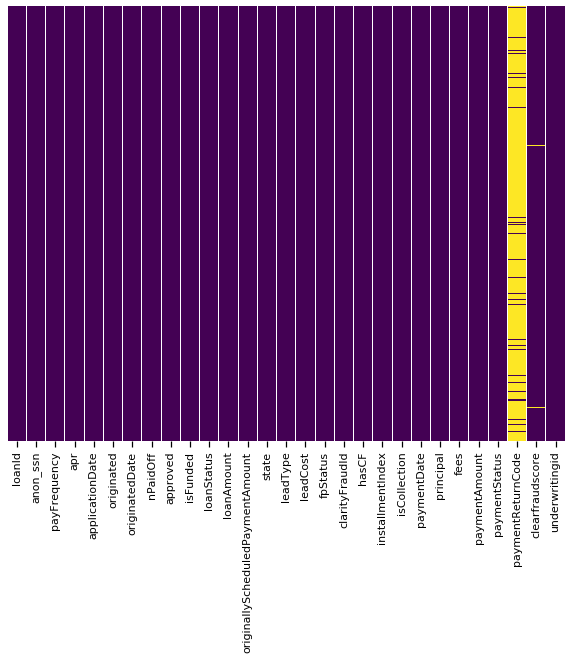

In [131]:
#Lets Visualise the missing values
fig, (axis1) = plt.subplots(1,1,figsize=(10,8))
sns.heatmap(merged.isnull(),yticklabels=False,cbar=False,cmap='viridis')

First I start data cleaning, I will use Date columns(applicationDate,paymentDate) to create some features. Not sure about Application date but I think Payment date might have some effect. So I will create columns-  Day and Month from both of these dates.

In [207]:
merged['applicationDate'] = pd.to_datetime(merged['applicationDate'], errors='coerce')
merged['paymentDate'] = pd.to_datetime(merged['paymentDate'], errors='coerce')
merged['applicationDate'] = pd.to_datetime(merged['applicationDate'], format="%d-%m-%y")
merged['paymentDate'] = pd.to_datetime(merged['paymentDate'], format="%d-%m-%y")
merged['Appday'] = merged['applicationDate'].dt.dayofweek
merged['AppMonth'] = merged['applicationDate'].dt.month
merged['Paymentday'] = merged['paymentDate'].dt.dayofweek
merged['PaymentMonth'] = merged['paymentDate'].dt.month

Now, I will drop few columns with ids, They wone be any help in our model anyway.

I will drop paymentReturnCode because more than 95% of values are missing.

I will impute mean values in the place of missing values in column- clearfraudscore

and drop few rows with NAs in fpStatus

In [208]:
merged = merged.drop(['loanId','anon_ssn','applicationDate','originatedDate','clarityFraudId','paymentReturnCode','underwritingid','paymentDate'], axis=1)
mean_value=merged['clearfraudscore'].mean()
merged['clearfraudscore']=merged['clearfraudscore'].fillna(mean_value)
merged = merged.drop(['fpStatus'], axis=1)
merged.dropna(inplace=True)
merged

payFrequency    apr  originated  nPaidOff  approved  isFunded  \
0                 B  199.0        True       0.0      True         1   
1                 B  199.0        True       0.0      True         1   
2                 B  199.0        True       0.0      True         1   
3                 B  199.0        True       0.0      True         1   
4                 B  199.0        True       0.0      True         1   
...             ...    ...         ...       ...       ...       ...   
558321            W  645.0        True       0.0      True         1   
558322            W  645.0        True       0.0      True         1   
558323            W  645.0        True       0.0      True         1   
558324            W  645.0        True       0.0      True         1   
558325            W  645.0        True       0.0      True         1   

           loanStatus  loanAmount  originallyScheduledPaymentAmount state  \
0       Paid Off Loan      3000.0                           6395.19    CA   
1       Paid Off Loan      3000.0                           6395.19    CA   
2       Paid Off Loan      3000.0                           6395.19    CA   
3       Paid Off Loan      3000.0                           6395.19    CA   
4       Paid Off Loan      3000.0                           6395.19    CA   
...               ...         ...                               ...   ...   
558321  Paid Off Loan       300.0                           1034.38    CT   
558322  Paid Off Loan       300.0                           1034.38    CT   
558323  Paid Off Loan       300.0                           1034.38    CT   
558324  Paid Off Loan       300.0                           1034.38    CT   
558325  Paid Off Loan       300.0                           1034.38    CT   

         leadType  leadCost  hasCF  installmentIndex  isCollection  principal  \
0       prescreen         0      1                 1         False     151.98   
1       prescreen         0      1                 2         False      49.08   
2       prescreen         0      1                 3         False      52.83   
3       prescreen         0      1                 4         False      56.86   
4       prescreen         0      1                 5         False      61.20   
...           ...       ...    ...               ...           ...        ...   
558321       lead         6      1                23         False      21.85   
558322       lead         6      1                24         False      24.56   
558323       lead         6      1                25         False      27.59   
558324       lead         6      1                26         False      31.01   
558325       lead         6      1                27         False      35.46   

          fees  paymentAmount paymentStatus  clearfraudscore  Appday  \
0       114.49         266.47       Checked            879.0       1   
1       217.39         266.47       Checked            879.0       1   
2       213.64         266.47       Checked            879.0       1   
3       209.61         266.47       Checked            879.0       1   
4       205.27         266.47       Checked            879.0       1   
...        ...            ...           ...              ...     ...   
558321   17.38          39.23     Cancelled            827.0       4   
558322   14.67          39.23     Cancelled            827.0       4   
558323   11.64          39.23     Cancelled            827.0       4   
558324    8.22          39.23     Cancelled            827.0       4   
558325    4.39          39.85     Cancelled            827.0       4   

        AppMonth  Paymentday  PaymentMonth  
0              1           2             1  
1              1           2             2  
2              1           2             2  
3              1           2             3  
4              1           2             3  
...          ...         ...           ...  
558321        12           3             5  
558322        12   

Now we have a clean dataset

# Visualisation

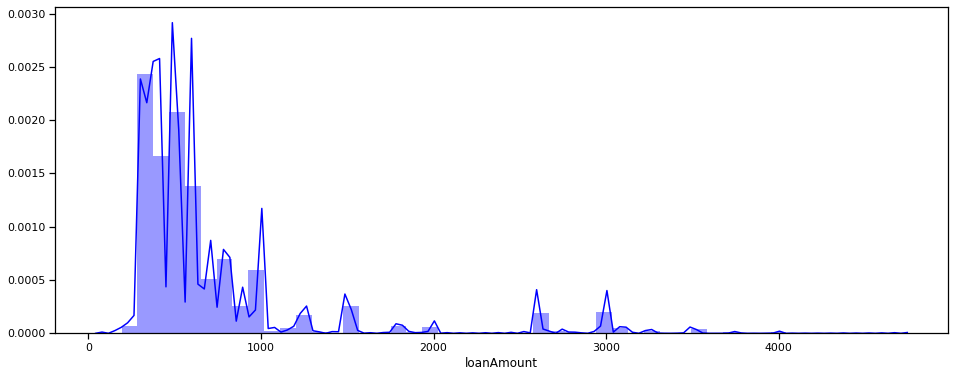

In [134]:
plt.figure(figsize=(16, 6))
sns.distplot(merged['loanAmount'], color='b')

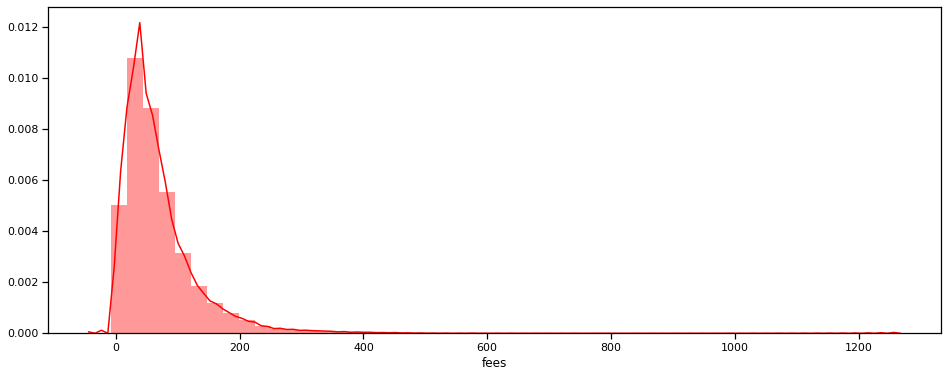

In [135]:
plt.figure(figsize=(16, 6))
sns.distplot(merged['fees'], color='r')

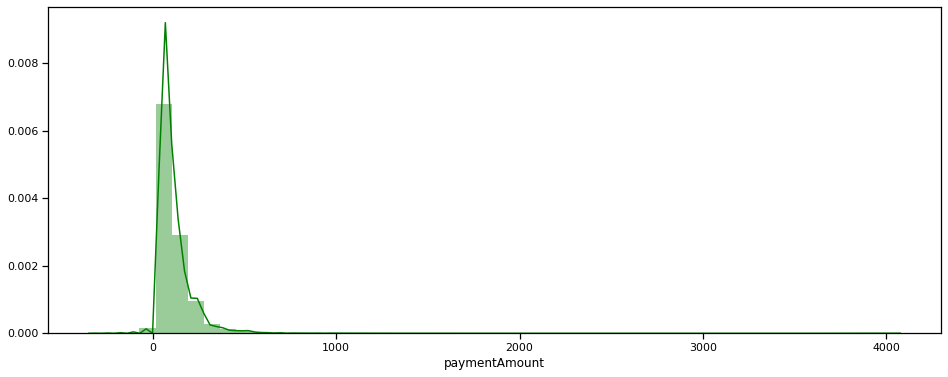

In [136]:
plt.figure(figsize=(16, 6))
sns.distplot(merged['paymentAmount'], color='g')

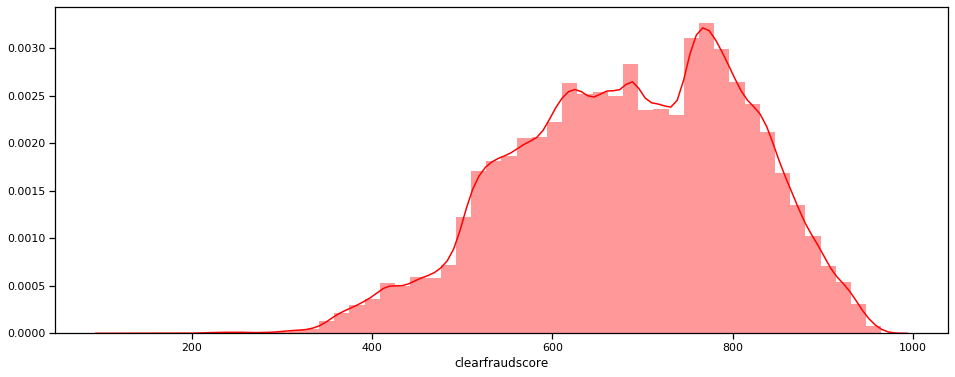

In [137]:
plt.figure(figsize=(16, 6))
sns.distplot(merged['clearfraudscore'], color='r')

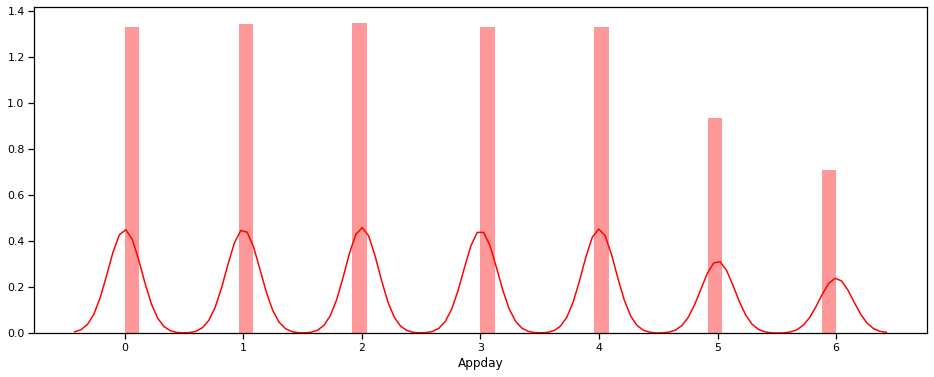

In [138]:
plt.figure(figsize=(16, 6))
sns.distplot(merged['Appday'], color='r')

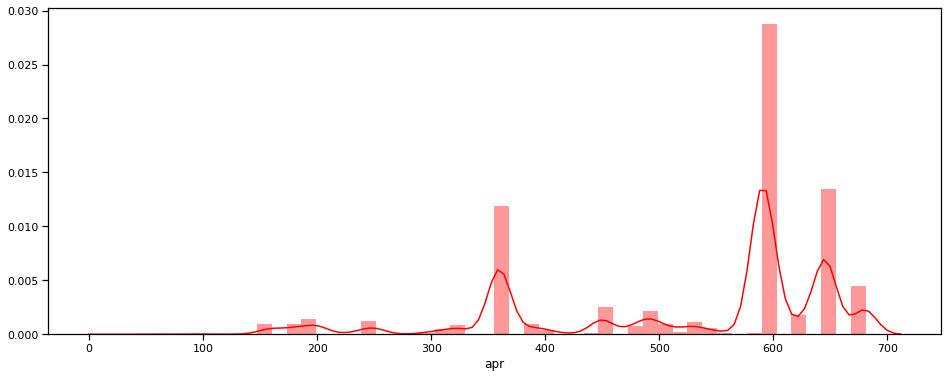

In [139]:
plt.figure(figsize=(16, 6))
sns.distplot(merged['apr'], color='r')

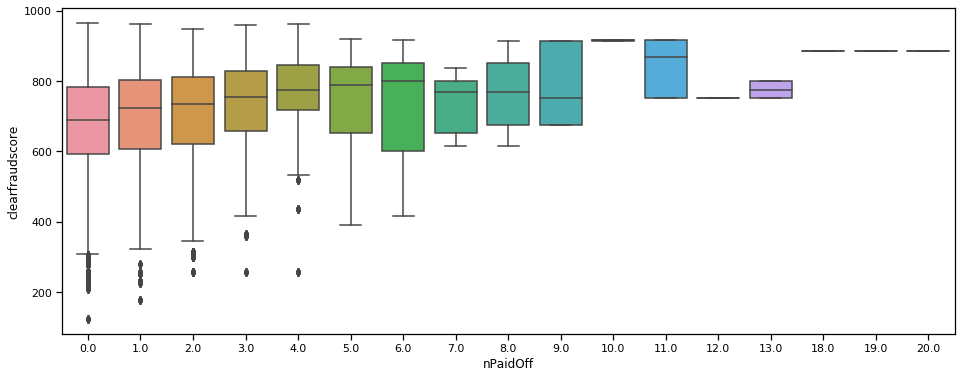

In [140]:
plt.figure(figsize=(16, 6))
sns.boxplot(x = 'nPaidOff',
            y="clearfraudscore",
            data=merged)

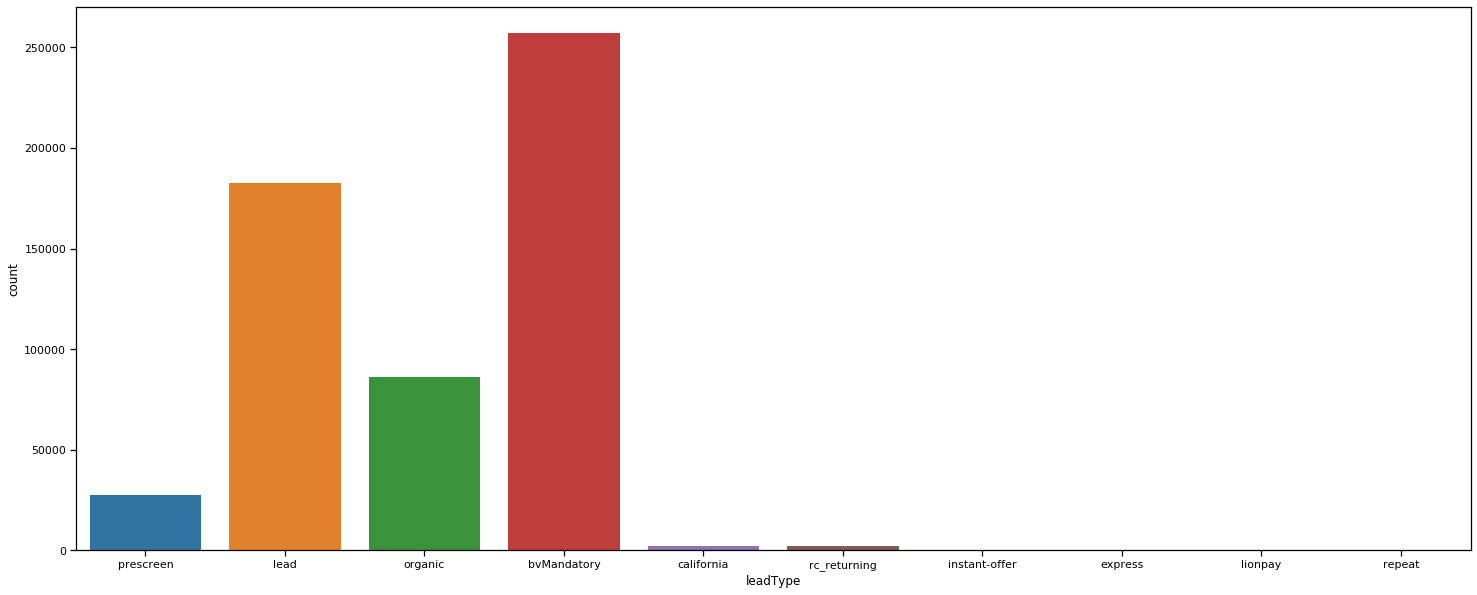

In [141]:
fig, (axis1) = plt.subplots(1,1,figsize=(25,10))
sns.countplot(x='leadType', data=merged);

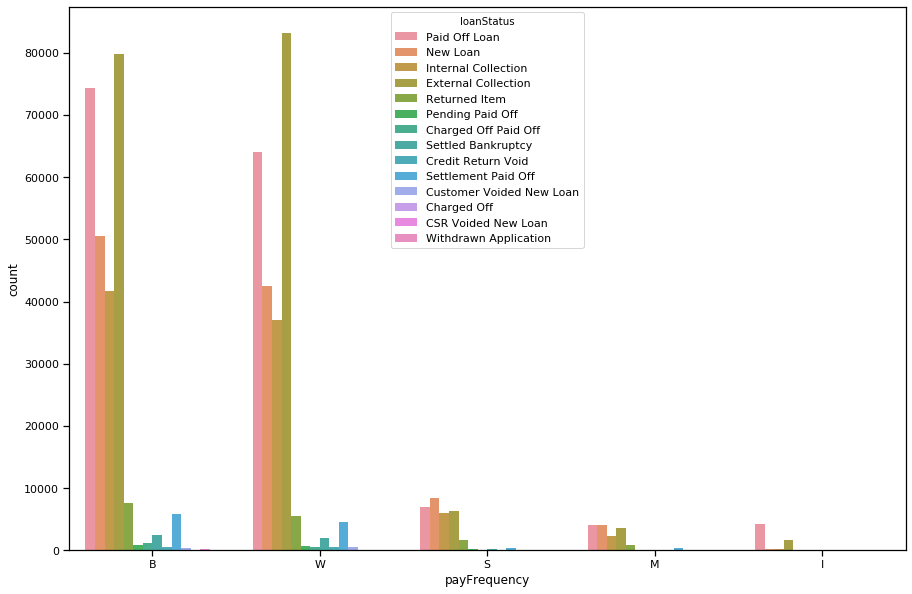

In [142]:
fig, (axis1) = plt.subplots(1,1,figsize=(15,10))
sns.countplot(merged['payFrequency'], hue=merged['loanStatus'])

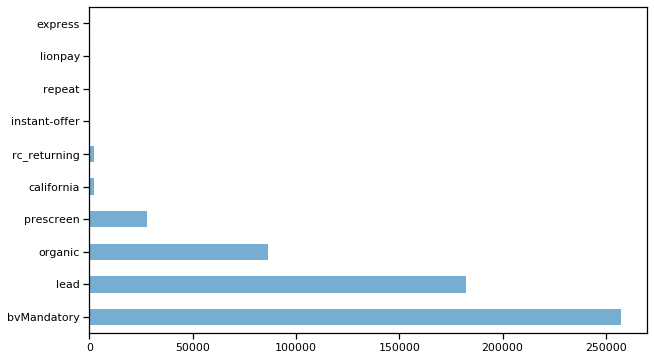

In [143]:
merged['leadType'].value_counts().plot(kind='barh',alpha=0.6, figsize=(10,6))
plt.show()

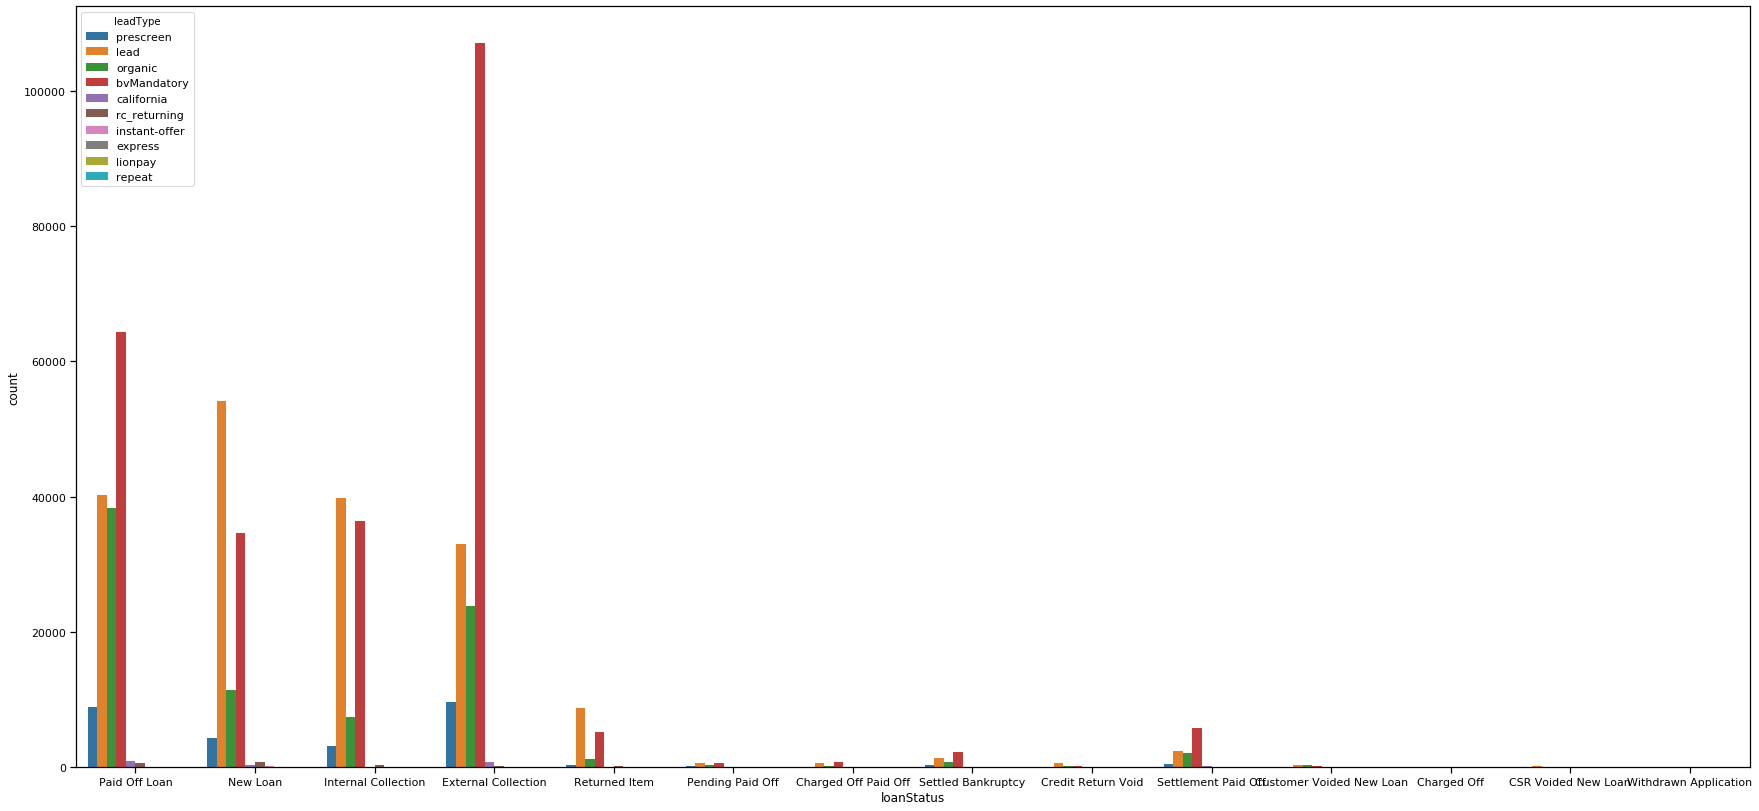

In [145]:
fig, (axis1) = plt.subplots(1,1,figsize=(30,14))
sns.countplot(merged['loanStatus'], hue=merged['leadType'])

We need to create a target variable for modelling purpose. Here,we are going to use paymentStatus as our target variable. 

Lets categorize the all categories from PaymentStatus variable into two classes: - 1 or 0.

We have - Cancelled , Checked, None, Rejected, Pending, Skipped , Rejected Awaiting Retry into PaymentStatus

Class 0: consists of levels which signifiy that loan was paid. We will consider:- Checked,Pending, None, Completed

Class 1: consists of levels which signifiy that loan was defaulted. we will consider:-Rejected, Cancelled, skipped, Rejected, Awaiting Retry

In [209]:
merged['paymentStatus'].value_counts(normalize=True)

Cancelled                  0.390332
Checked                    0.305740
None                       0.236611
Rejected                   0.048656
Pending                    0.013396
Skipped                    0.005239
Rejected Awaiting Retry    0.000027
Name: paymentStatus, dtype: float64

In [210]:
labels = {0: ['Checked','None','Pending'], 
          1:['Rejected','Cancelled','Skipped','Rejected awaiting retry']}

def map_func(x):
    for k,v in labels.items():
        if x in v:
            return k

In [211]:
merged['Outcome'] = merged['paymentStatus'].map(map_func)
merged = merged[merged['Outcome'].notna()].reset_index(drop=True)
merged['Outcome'] = merged['Outcome'].astype(int)
prob_1 = merged['Outcome'].value_counts(normalize=True)[0]
prob_0 = merged['Outcome'].value_counts(normalize=True)[1]
merged['Outcome'].value_counts(normalize=True)

0    0.555762
1    0.444238
Name: Outcome, dtype: float64

Our target varaibls is quite nicely balanced

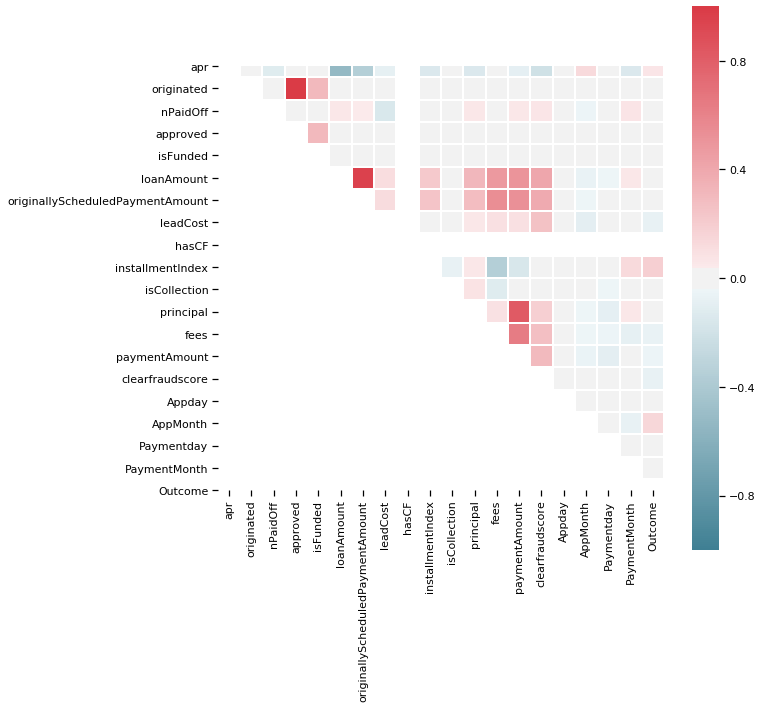

In [212]:
#Lets check the correlation
dataViz = merged
sns.set_context(context='notebook')
fig, ax = plt.subplots(figsize=(10,10)) 
corr = dataViz.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.tril_indices_from(mask)] = True
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap,linewidths=1, vmin=-1, vmax=1, square=True, cbar=True, center=0, ax=ax, mask=mask)

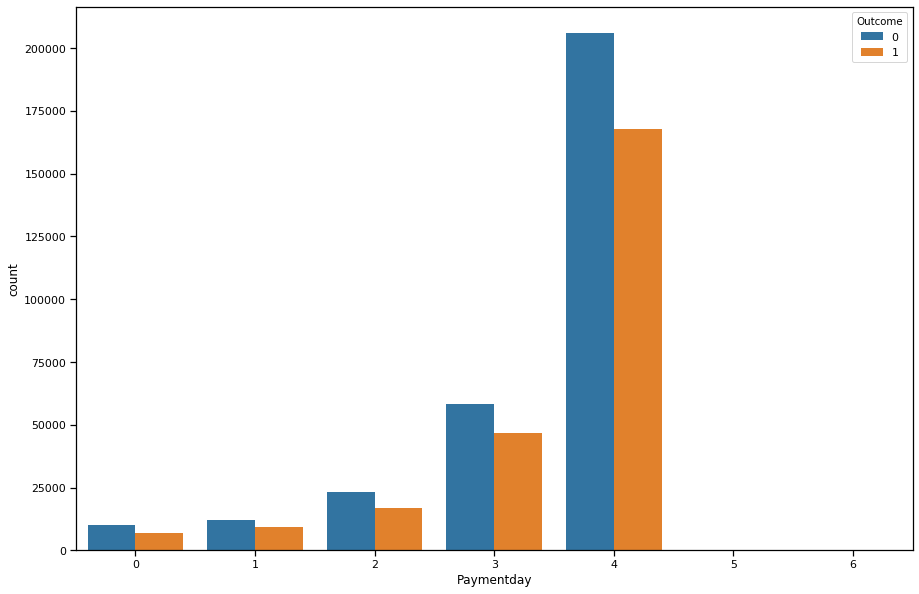

In [150]:
fig, (axis1) = plt.subplots(1,1,figsize=(15,10))
sns.countplot(merged['Paymentday'], hue=merged['Outcome'])

Friday seems to be a very busy day

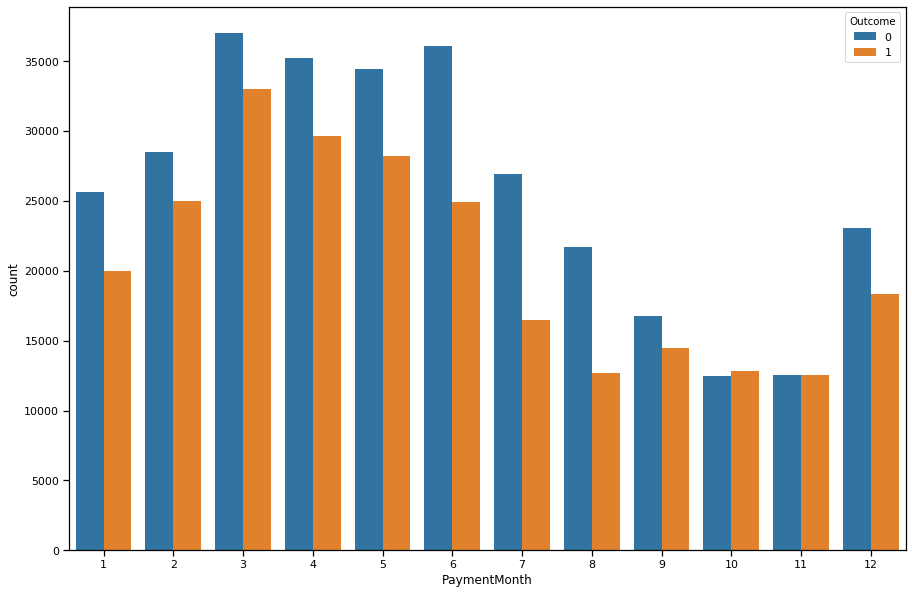

In [151]:
fig, (axis1) = plt.subplots(1,1,figsize=(15,10))
sns.countplot(merged['PaymentMonth'], hue=merged['Outcome'])

March, April, May and June are more busier than rest of the months.

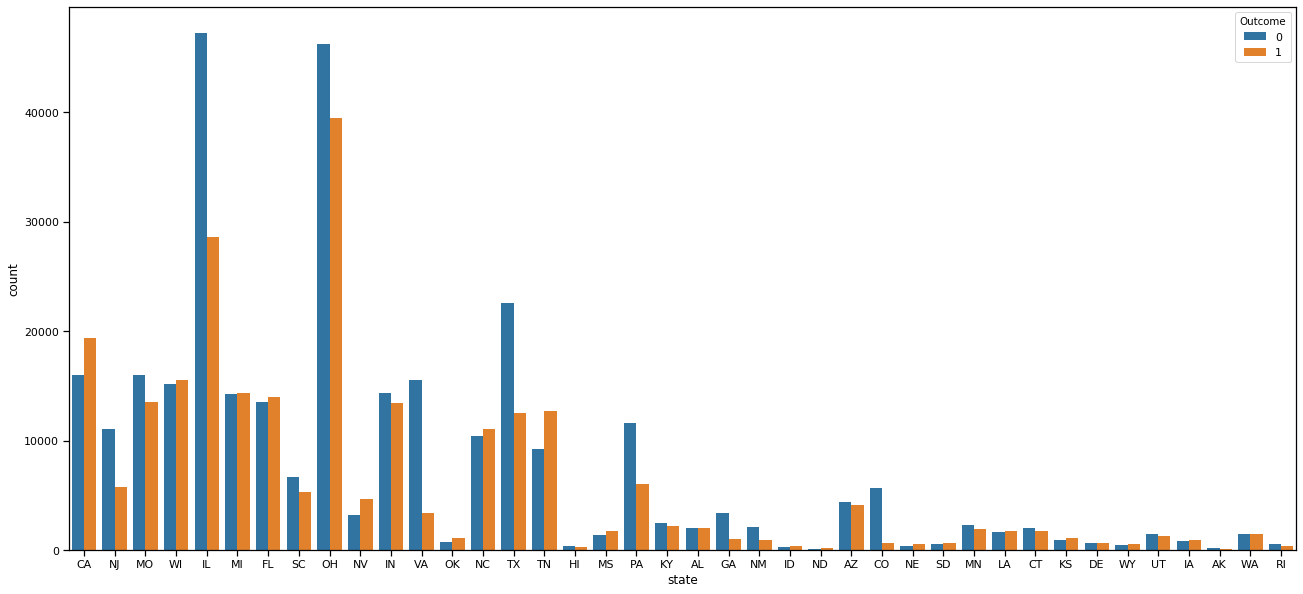

In [152]:
fig, (axis1) = plt.subplots(1,1,figsize=(22,10))
sns.countplot(merged['state'], hue=merged['Outcome'])

In [196]:
merged['state'].value_counts(normalize=True)

OH    0.153689
IL    0.135890
CA    0.063406
TX    0.062949
WI    0.054985
MO    0.053029
MI    0.051372
IN    0.049877
FL    0.049368
TN    0.039346
NC    0.038567
VA    0.034046
PA    0.031699
NJ    0.030177
SC    0.021539
AZ    0.015254
NV    0.014095
CO    0.011467
KY    0.008421
GA    0.007996
MN    0.007731
AL    0.007280
CT    0.006730
LA    0.006178
MS    0.005526
NM    0.005440
WA    0.005311
UT    0.005037
KS    0.003670
OK    0.003398
IA    0.003183
SD    0.002307
DE    0.002271
WY    0.001793
NE    0.001757
RI    0.001632
ID    0.001207
HI    0.001143
AK    0.000690
ND    0.000545
Name: state, dtype: float64

Around 29% of our loan is only in two states OH and IL.

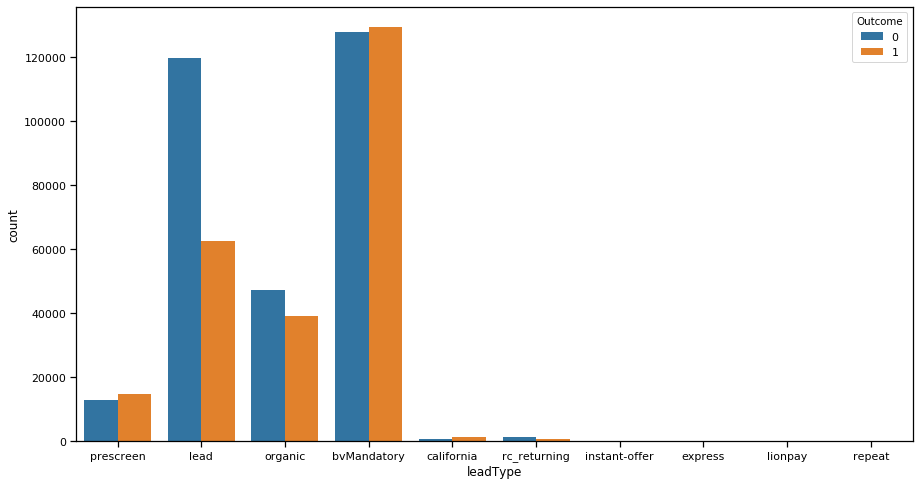

In [153]:
fig, (axis1) = plt.subplots(1,1,figsize=(15,8))
sns.countplot(merged['leadType'], hue=merged['Outcome'])

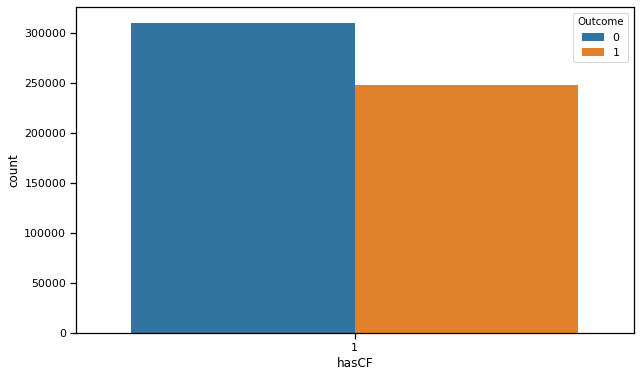

In [154]:
fig, (axis1) = plt.subplots(1,1,figsize=(10,6))
sns.countplot(merged['hasCF'], hue=merged['Outcome'])

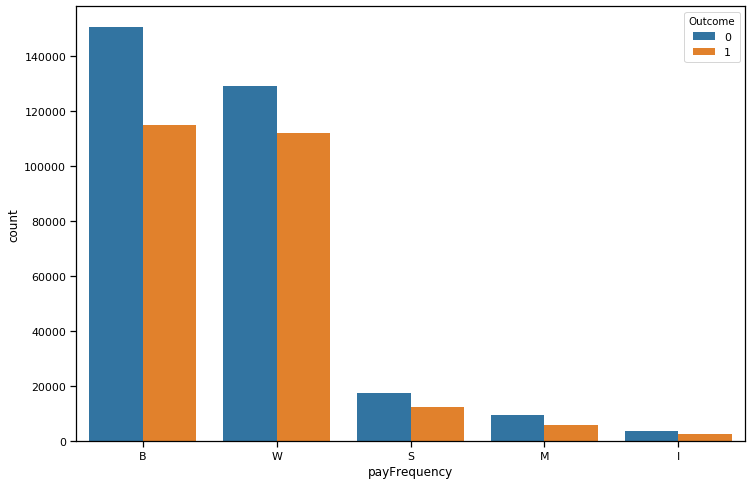

In [155]:
fig, (axis1) = plt.subplots(1,1,figsize=(12,8))
sns.countplot(merged['payFrequency'], hue=merged['Outcome'])

More frequent the payments are, lesser will be the payment amount and thus lesser will be the threshold to miss the payment. Higher the amount , more chances of being missed the payment.

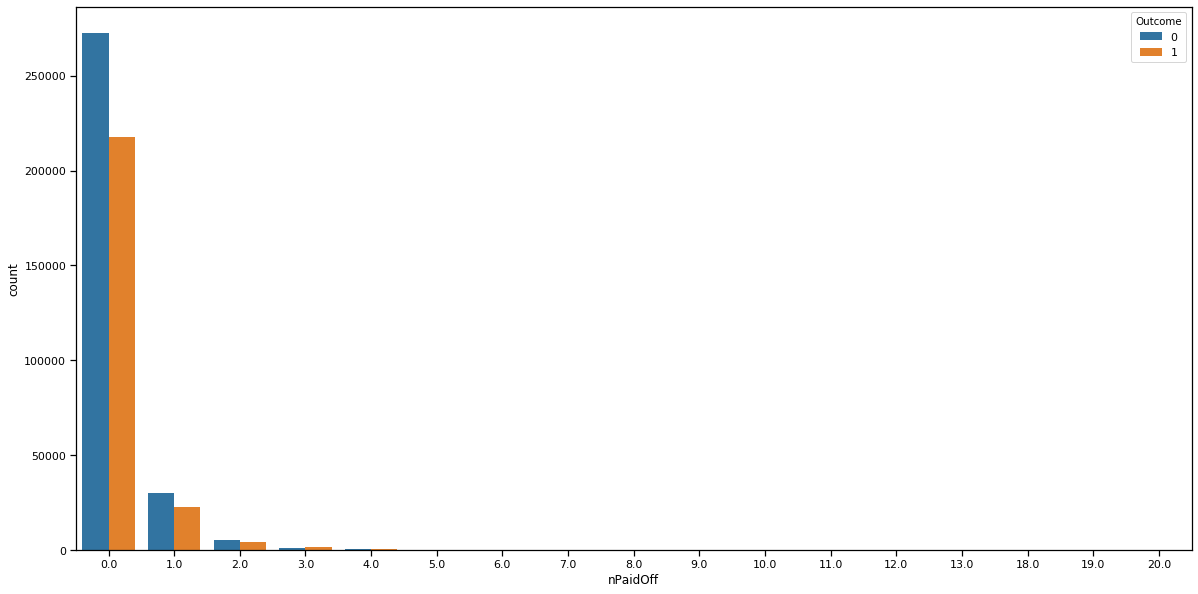

In [156]:
fig, (axis1) = plt.subplots(1,1,figsize=(20,10))
sns.countplot(merged['nPaidOff'], hue=merged['Outcome'])

People who havent paid off any loan in past, are tend to default

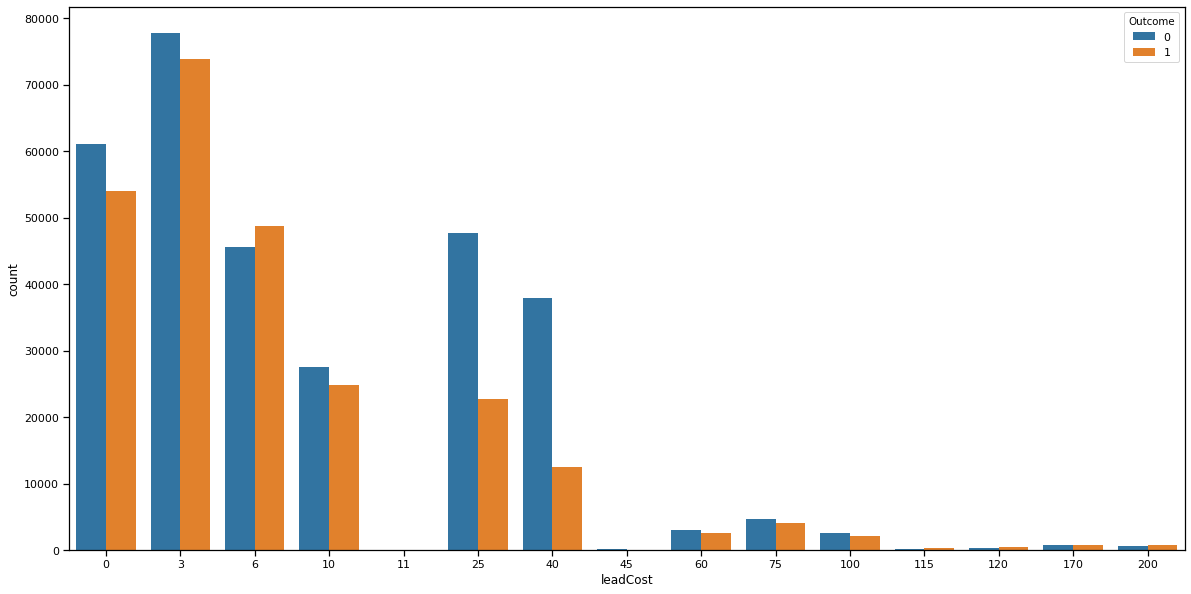

In [163]:
fig, (axis1) = plt.subplots(1,1,figsize=(20,10))
sns.countplot(merged['leadCost'], hue=merged['Outcome'])

Looks like- higher the cost means it took effort to sell the loan, which may signify a risk averse person and thus may signify lower chances of default

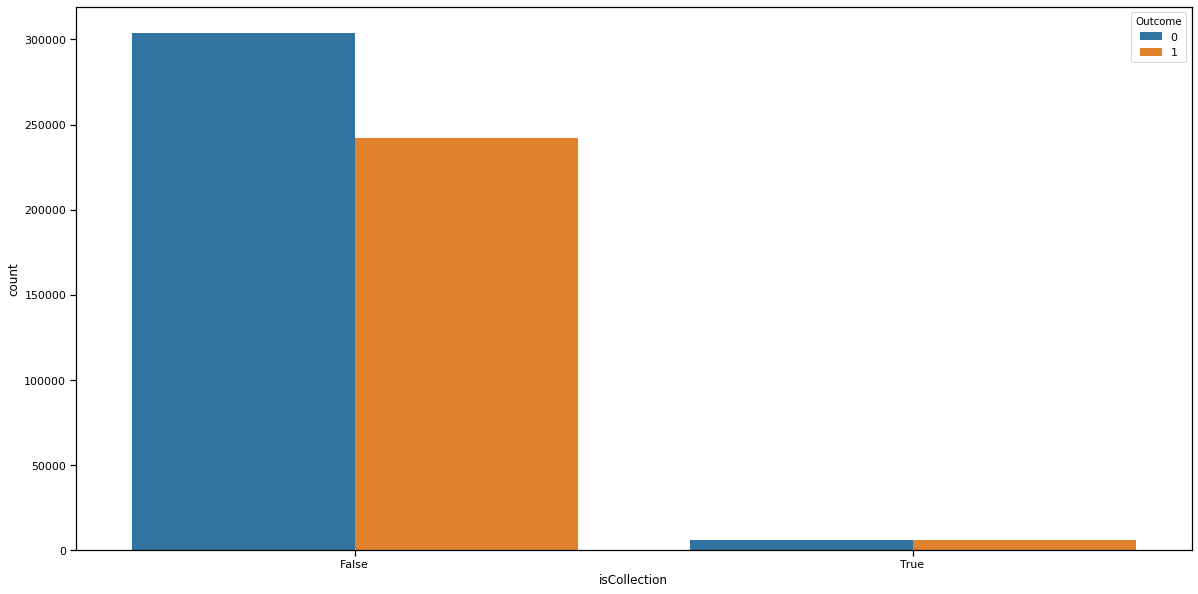

In [166]:
fig, (axis1) = plt.subplots(1,1,figsize=(20,10))
sns.countplot(merged['isCollection'], hue=merged['Outcome'])

isCollection if TRUE-------- higher risk of default

# Few other finding

loanAmount--

Little impact on default value
if the loan amount is high but the apr is low that means a very good deal and should not be defaulted
if the loan amount is small but the frequency is only one or the interest rate is very high, that may increase the risk of default.


fpStatus----High risk of default for - Rejected | Cancelled | Skipped

             Moderate risk of default - None
             
             Low risk of default - Checked | Pending
             
             No risk of default - No Payments/No Schedule"
             
             
principal---- Lower the vaue higher the chances of default

#originallyScheduledPaymentAmount - higher the amount higher the chances of default

In [213]:
#Payment amount is sum of Principal and Fees, So i will drop this. No point of using same thing again and again.
merged = merged.drop(['paymentAmount'], axis=1)

# Lets create dummy variable. One hot Encoding

We are going to check the data type of all the variables.

In [214]:
print("------  Data Types  ----- \n",merged.dtypes)
print("------  Data type Count  ----- \n",merged.dtypes.value_counts())

------  Data Types  ----- 
 payFrequency                         object
apr                                 float64
originated                             bool
nPaidOff                            float64
approved                               bool
isFunded                              int64
loanStatus                           object
loanAmount                          float64
originallyScheduledPaymentAmount    float64
state                                object
leadType                             object
leadCost                              int64
hasCF                                 int64
installmentIndex                      int64
isCollection                           bool
principal                           float64
fees                                float64
paymentStatus                        object
clearfraudscore                     float64
Appday                                int64
AppMonth                              int64
Paymentday                            int64
Paym

In [215]:
dummy_variables = ['payFrequency','loanStatus','state','leadType']
for var in dummy_variables:
    dummy = pd.get_dummies(merged[var], prefix = var, drop_first = False)
    merged = pd.concat([merged, dummy], axis = 1)
merged = merged.drop(dummy_variables, axis = 1)

In [216]:
merged = merged.drop(['originated','approved','paymentStatus'], axis=1)

# Random Forest

In [217]:
y = merged['Outcome']
X = merged.drop(['Outcome'],axis=1)

In [218]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
print(classification_report(y_test,predictions ))  
print(accuracy_score(y_test, predictions ))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91     62105
           1       0.91      0.86      0.88     49551

    accuracy                           0.90    111656
   macro avg       0.90      0.90      0.90    111656
weighted avg       0.90      0.90      0.90    111656

0.8991545461058967


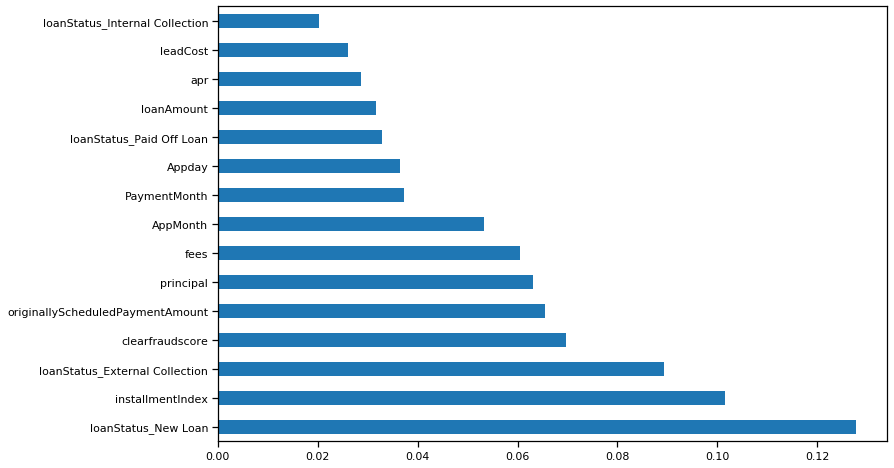

In [219]:
#Top 10 feature
fig, (axis1) = plt.subplots(1,1,figsize=(12,8))
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# XGBOOST

In [224]:
xgb_model = xgb.XGBClassifier(max_depth=5, learning_rate=0.08, objective= 'binary:logistic',n_jobs=-1).fit(X_train, y_train)
print('Accuracy of XGB classifier on training set: {:.2f}'
       .format(xgb_model.score(X_train, y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'
       .format(xgb_model.score(X_test[X_train.columns], y_test)))

Accuracy of XGB classifier on training set: 0.81
Accuracy of XGB classifier on test set: 0.81


In [225]:
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.81      0.83     62105
           1       0.78      0.81      0.79     49551

    accuracy                           0.81    111656
   macro avg       0.81      0.81      0.81    111656
weighted avg       0.81      0.81      0.81    111656



# Logistic Regression

In [226]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(y_test, logreg.predict(X_test))))

Logistic regression accuracy: 0.779


In [227]:
logRegprediction = logreg.predict(X_test)
print(classification_report(y_test,logRegprediction ))  
print(accuracy_score(y_test, logRegprediction ))

              precision    recall  f1-score   support

           0       0.81      0.78      0.80     93322
           1       0.74      0.78      0.76     74162

    accuracy                           0.78    167484
   macro avg       0.78      0.78      0.78    167484
weighted avg       0.78      0.78      0.78    167484

0.7791191994459172


In [223]:
#Probablity of defalut
rf_probs = rf.predict_proba(X_test)
rf_probs

array([[0.2, 0.8],
       [1. , 0. ],
       [0.1, 0.9],
       ...,
       [0.7, 0.3],
       [0.1, 0.9],
       [1. , 0. ]])

# Lets Compare all the models

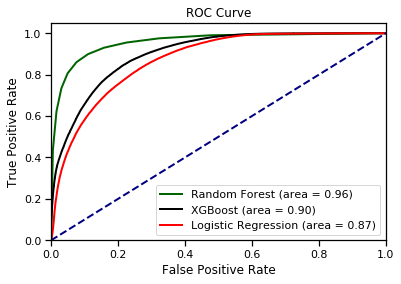

In [228]:
rf.fit(X_train, y_train)
rf_predict_probabilities = rf.predict_proba(X_test)[:,1]
y_predict_xgb = xgb_model.predict_proba(X_test)[:,1]
lr_predict = logreg.predict_proba(X_test)[:,1]

lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_predict)
lr_roc_auc = auc(lr_fpr, lr_tpr)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_predict_probabilities)
rf_roc_auc = auc(rf_fpr, rf_tpr)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, y_predict_xgb)
xgb_roc_auc = auc(xgb_fpr, xgb_tpr)

plt.figure()

plt.plot(rf_fpr, rf_tpr, color='darkgreen',
         lw=2, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot(xgb_fpr, xgb_tpr, color='black',
         lw=2, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot(lr_fpr, lr_tpr, color='red',
         lw=2, label='Logistic Regression (area = %0.2f)' % lr_roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

All the 3 models, we tried are staisfactory but Random Forest is showing the best results among all three models.

Precision and recall are better for Random forest.

Random Forest Model's Accuracy is very high compard to Logistic Regression and XGBoost Model.

For future imporvements I would try to hypertune my variables and I will spend more time on anlysing the features. 

I will use the 3rd dataset as well on which I couldnt spent much time. For this model, I just used one column from this dataset, but it was actually a good decision to use Fraud score.

Thank you